## EPS Example Notebook 

This notebook shows an example replicating previous the simple electric power system implemented in [IBFM](https://github.com/DesignEngrLab/IBFM) in the `eps example` directory, with some basic fault propagation and visualization.

In [2]:
from eps import EPS
import fmdtools.sim.propagate as propagate

This script provides some example I/O for using static models, using the EPS system implemented in eps.py as an example.

A graphical representaiton of this system is shown below:

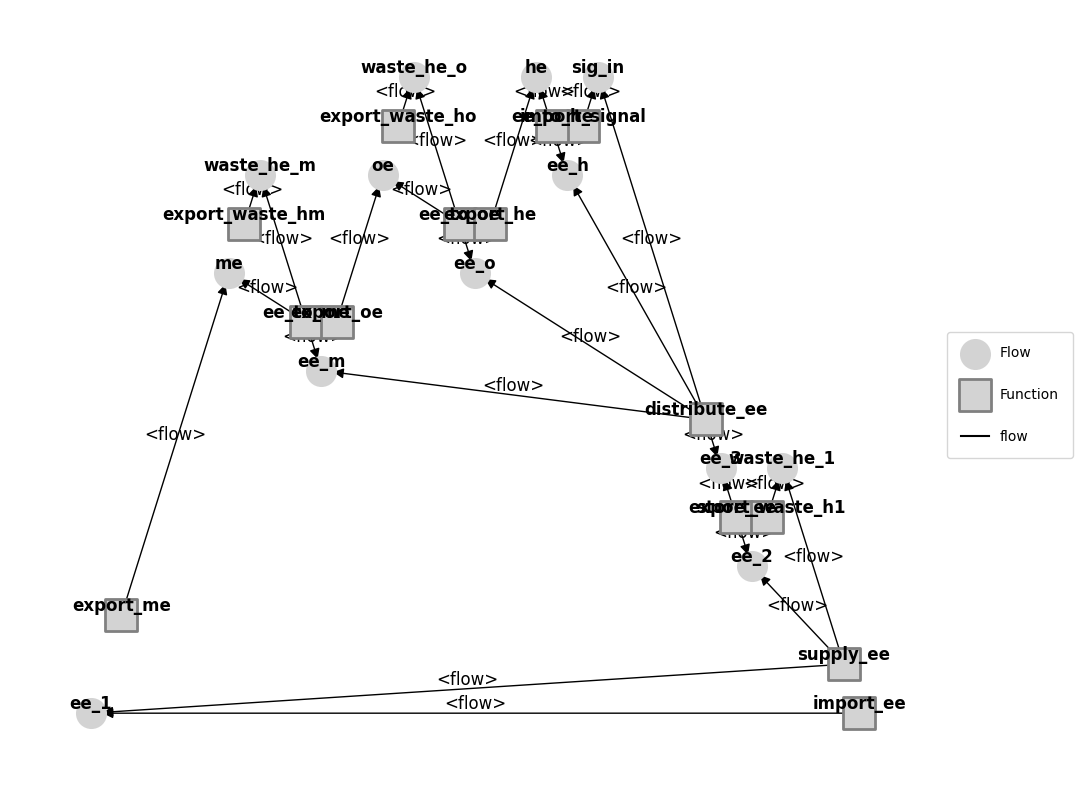

In [3]:
mdl= EPS()
mg = mdl.as_modelgraph()
fig, ax = mg.draw()

As with dynamic models, in static models we use ``fp.run_one_fault`` to see the effects of single faults. All setup is performed in the Model class definition

In [4]:
result, mdlhist = propagate.one_fault(mdl, 'ee_to_me', 'toohigh_torque', desired_result="graph")

In this case, however, the output in ``mdlhists`` will be a single-dimensional dictionary (not something we can plot very well)

C:\Users\dhulse\Documents\GitHub\fmdtools\fmdtools\analyze\history.py:759: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min_ind, max_ind)


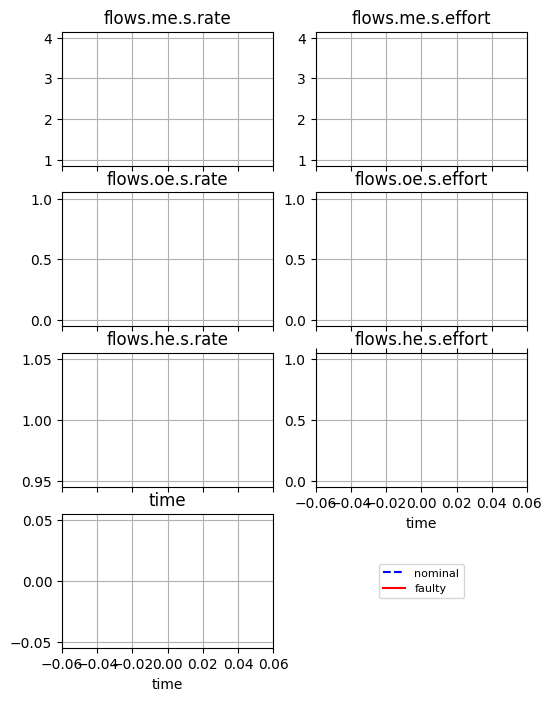

In [5]:
fig, ax = mdlhist.plot_line(*mdlhist.nominal.keys())

As a result, it's better to look at the results graph for a visualization of what went wrong. In this case ``resgraph`` better represents the fault propagation of the system than in a dynamic model, since there is only one time-step to represent (rather than a set)

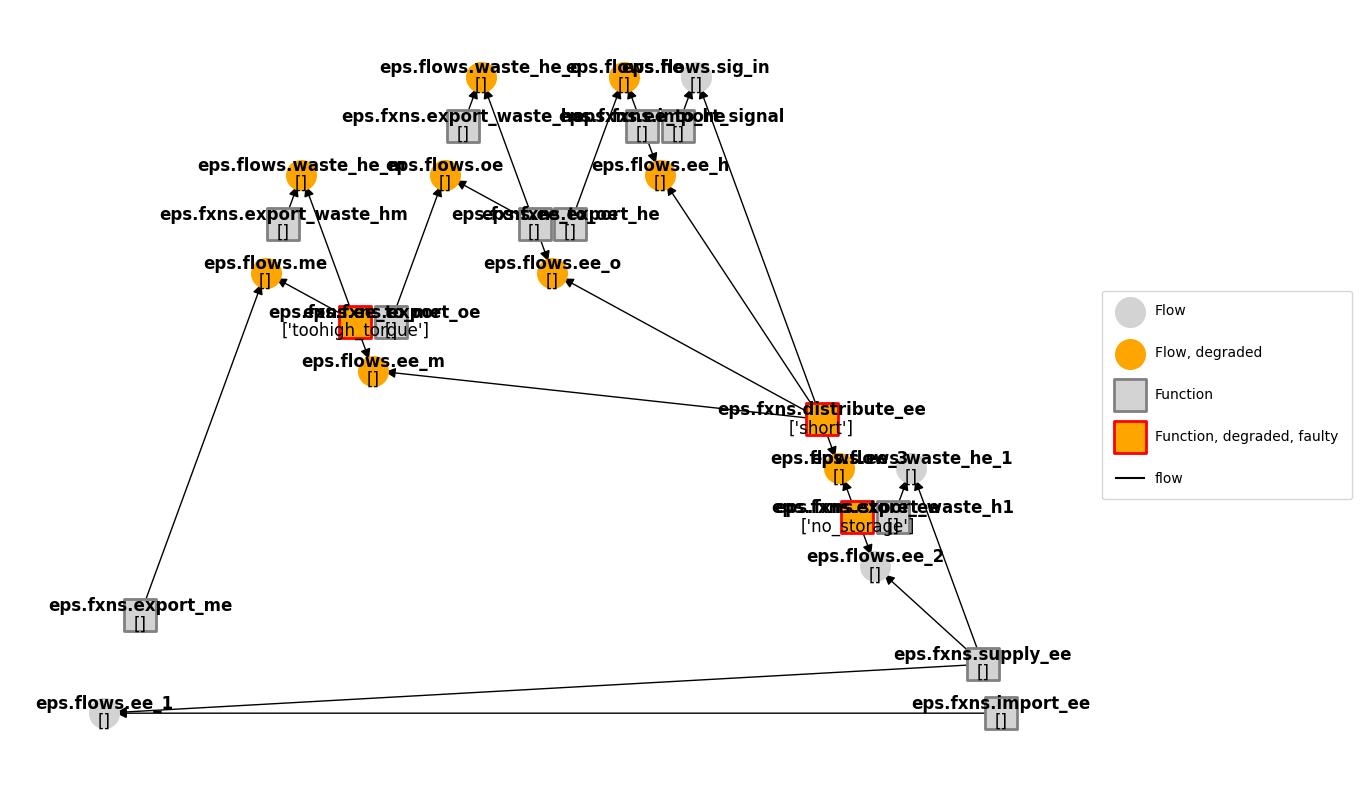

In [6]:
result.graph.set_edge_labels(title='')
fig, ax = result.graph.draw(figsize=(14,10))

We can run the set of single-fault scenarios on this model using ``fmdtools.sim.propagate.single_faults``. For single-fault scenarios, one does not need to use a ``SampleApproach``, since all faults are injected at a single time-step.

In [7]:
endclasses, mdlhists = propagate.single_faults(mdl, staged=True)

SCENARIOS COMPLETE: 100%|██████████| 35/35 [00:00<00:00, 112.84it/s]


Using ``analyze.tabulate.result_summary_fmea``, one can see the degradation effects of this fault on the flows:

In [8]:
from fmdtools.analyze.tabulate import result_summary_fmea

In [9]:
tab = result_summary_fmea(endclasses, mdlhists, *mdl.fxns, *mdl.flows)
tab

,degraded,faulty,rate,cost,expected_cost
import_ee_low_v_t0p0,[],[],0.00001,700.0,306.6
import_ee_high_v_t0p0,[],[],0.000005,3350.0,733.65
import_ee_no_v_t0p0,[],[],0.00001,1550.0,678.9
supply_ee_adverse_resist_t0p0,[],[],0.000002,1650.0,144.54
supply_ee_minor_overload_t0p0,[],[],0.00001,5150.0,2255.7
supply_ee_major_overload_t0p0,[],[],0.000003,3650.0,479.61
supply_ee_short_t0p0,[],[],0.0,5150.0,22.557
supply_ee_open_circuit_t0p0,[],[],0.0,1450.0,3.1755
store_ee_low_storage_t0p0,"['me', 'oe', 'he']",[],0.000005,2000.0,438.0
store_ee_no_storage_t0p0,[],[],0.000005,3250.0,711.75
